# SVM on Iris datasets - Multiclass Classification

In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, 0:2]  #taking only 2 features for visualisation
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.score(X_test, y_test)

0.78

# Plotting the decision boundary

In [7]:
def make_grid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1  #finding the min and max values of x1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1  #finding the min and max values of x2
    a = np.arange(x1_min, x1_max, h)  #creates an array with min and max values and all entries are separated by h.
    b = np.arange(x2_min, x2_max, h) 
    xx, yy = np.meshgrid(a, b)  #this replicates a and b
    return xx, yy

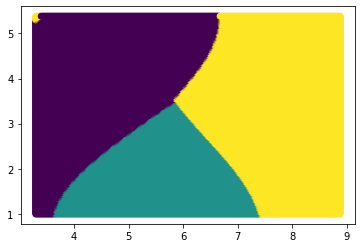

In [8]:
xx, yy = make_grid(X[:, 0], X[:,1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #ravel converts a n-D array to 1D array and c_ means to combine both the 1D arrays.
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)  
plt.show()

# If kernel = linear, then we get linear decision boundaries

In [11]:
clf1 = svm.SVC(kernel = 'linear')
clf1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
clf1.score(X_test, y_test)

0.78

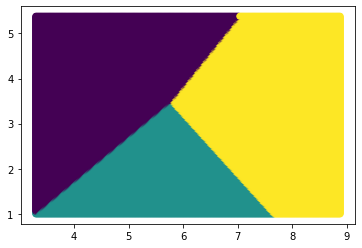

In [13]:
xx, yy = make_grid(X[:, 0], X[:,1])
predictions = clf1.predict(np.c_[xx.ravel(), yy.ravel()])  #ravel converts a n-D array to 1D array and c_ means to combine both the 1D arrays.
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)  
plt.show()